# Análise dos dados
### Prática 4 - Magnetostática e Lei de Faraday

## Tarefa 1: calibração da sonda Hall
Usaremos a aproximação para o campo magnético no centro do solenóide longo
$$ B = \mu_0 n I $$
onde $n$ é a densidade de espiras e $I$ é a corrente.

Valor esperado para o calibre em torno de 280
K = 262.15814968061466 T/V
Intercept = -0.0006351201600926781


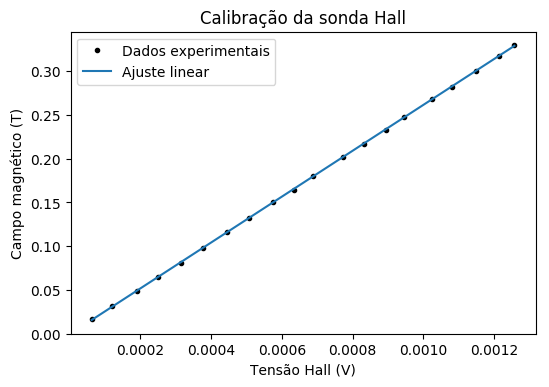

In [64]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

mu_0 = np.pi*4e-7   # valor exato
N = 760
L = 15e-2
n = N/L

dados1 = np.loadtxt('dados/calibração.dat').T
Vfundo = 4.7e-3
Vh, I = dados1
Vh = Vh-Vfundo
B = mu_0*n*I

ajuste1 = stats.linregress(B,Vh)
slope1,intercept1 = ajuste1[:2] # falta análise de erros
K = slope1

print("Valor esperado para o calibre em torno de 280\nK = {} T/V".format(K))
print("Intercept =",intercept1)

plt.figure(dpi=100)
plt.plot(B,Vh,'.k',label="Dados experimentais")
plt.plot(B,slope1*B+intercept1,label='Ajuste linear')
plt.legend(loc='best')
plt.title('Calibração da sonda Hall')
plt.xlabel("Tensão Hall (V)")
plt.ylabel("Campo magnético (T)")
plt.show()

## Tarefa 3: campo magnético de uma bobina circular e de um par de bobinas em configuração anti-Helmholtz

Ajuste (bobina): corrente 1.0403557507383672 A, raio 0.14733186839960202 m, z0 0.14733186839960202 m


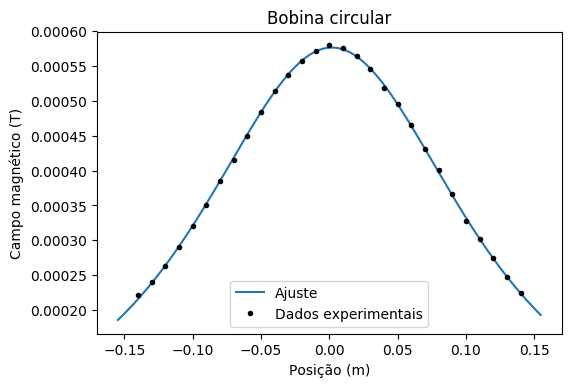

Ajuste (anti-Helmholtz): corrente = 1.1338720462891414 A, a = 0.15352249643397245 m, b = 0.14544595713785674 m, z0 = 0.0031550053289305653 m


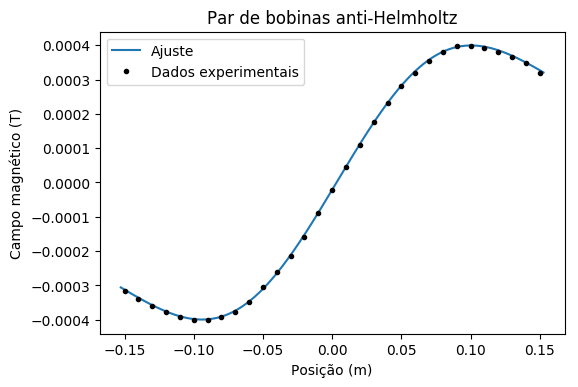

In [24]:
from scipy import optimize

N = 130 # número de espiras por bobina

# Modelos para ajuste
def bobina(z, I, a, z0):
    return mu_0*N*I*a**2/(2*((z-z0)**2 + a**2)**(3/2))
def antihelmholtz(z, I, a, b, z0):
    return bobina(z-b/2,I,a,z0) - bobina(z+b/2,I,a,z0)

# Bobina
dados31 = np.loadtxt('dados/bobina.dat').T
z,Vh = dados31
Vfundo = -.002
Vh = Vh - Vfundo
B = Vh/K
a = 14e-2 #substituir com dados reais
I = 1.0   #substituir com dados reais

ajuste31,mcov31 = optimize.curve_fit(bobina,z,B,[I,a,0])
I = ajuste31[0]
a = ajuste31[1]
z0 = ajuste31[2]

print("Ajuste (bobina): corrente {} A, raio {} m, z0 {} m".format(I,a,a,z0))

plt.figure(dpi=100)
tz = 1.05*np.linspace(-a,a,300)
plt.plot(tz,bobina(tz,I,a,z0),label='Ajuste')
plt.plot(z,B,'.k',label="Dados experimentais")
plt.legend()
plt.title('Bobina circular')
plt.xlabel("Posição (m)")
plt.ylabel("Campo magnético (T)")
plt.show()

# Par anti-Helmholtz
dados32 = np.loadtxt('dados/antihelmholtz.dat').T
z,Vh = dados32
Vfundo = -.001
Vh = Vh - Vfundo
B = Vh/K
a = 15e-2 # substituir com dados reais
I = 0.5   # substituir com dados reais

ajuste32,mcov32 = optimize.curve_fit(antihelmholtz,z,B,[I,a,a,0])
I = ajuste32[0]
a = ajuste32[1]
b = ajuste32[2]
z0 = ajuste32[3]
print("Ajuste (anti-Helmholtz): corrente = {} A, a = {} m, b = {} m, z0 = {} m".format(*ajuste32))

plt.figure(dpi=100)
tz = 1.05*np.linspace(-b,b,300)
plt.plot(tz,antihelmholtz(tz,I,a,b,z0),label='Ajuste')
plt.plot(z,B,'.k',label='Dados experimentais')
plt.legend()
plt.title('Par de bobinas anti-Helmholtz')
plt.xlabel("Posição (m)")
plt.ylabel("Campo magnético (T)")
plt.show()

## Tarefa 4: campo magnético no solenoide + lei de Faraday

In [33]:
N = 760
L = 15e-2
n = N/L

R = 10.1 # (escala de 200 ohm) resistência ligada ao solenoide
r = 1.6 # (escala de 200 ohm) resistência DO solenoide
phi = 0 # fase (segundos), valor esperado = 0
Vh = 0.7 # tensão Hall medida
B = Vh/K # amplitude do campo magnético
Vr = 3.3 # tensão do gerador de funções (aplicada no resistor)
I = Vr/(R+r) # amplitude de corrente
B0 = mu_0*I*n # valor esperado pro B, aproximação de solenoide longo
print("Amplitude do campo: {} mT (esperada), {} mT (medida)".format(B0*1e3,B*1e3))

Amplitude do campo: 1.795809544205858 mT (esperada), 2.6701439602499666 mT (medida)


## Tarefa 7: indutância mútua de solenoides coaxiais

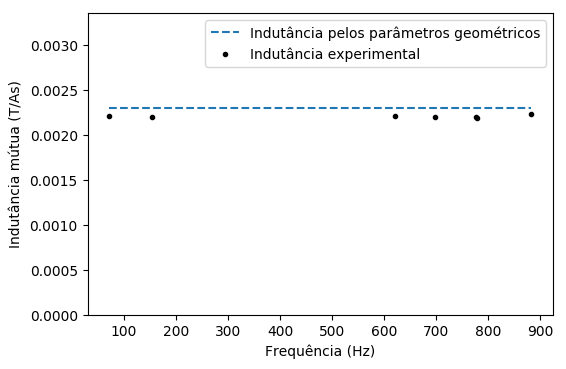

Indutância pelos parâmetros geométricos: 2.300708416740141 T/As
Indutância pelos dados experimentais: [2.21235513 2.20520466 2.21397819 2.20713891 2.20183722 2.19646965
 2.23770233] T/As


In [81]:
N1,a = 760, 15.20e-2 #solenoide externo
N2,b,D = 2100, 59.95e-3, 14.90e-3 #solenoide interno, medidas com paquímetro (+- 0.05 mm)
A = np.pi*D*D/4 # área de seção reta do solenoide interno

Lteo = mu_0*N1*N2*A/a # indutância mútua obtida teoricamente

R = 98.6 # (escala de 200 ohm) resistência do resistor ligado ao solenoide externo
dados7 = np.loadtxt('dados/indutancia.dat').T
f = dados7[0] # +- 0.05, frequência (Hz) da corrente alternada
eps0 = dados7[1] # tensão de pico no solenoide interno
V0 = dados7[2] # tensão de pico no resistor ligado ao solenoide externo

Lmed = eps0*R/(2*np.pi*f*V0) # indutância mútua experimental

plt.figure(dpi=100)
plt.plot([f[0],f[-1]],[Lteo,Lteo],'--',label='Indutância pelos parâmetros geométricos')
plt.plot(f,Lmed,'.k',label='Indutância experimental')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Indutância mútua (T/As)')
plt.ylim(0,np.max(Lmed)*1.5)
plt.legend()
plt.show()

print("Indutância pelos parâmetros geométricos: {} T/As".format(Lteo*1e3))
print("Indutância pelos dados experimentais: {} T/As".format(Lmed*1e3))